* Watched this intro video:  https://www.youtube.com/watch?v=J6Ok8p463C4&t=206s
* Copied code from this Tensorflow guide https://www.tensorflow.org/tutorials/keras/classification

In [5]:
import tensorflow as tf

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# a magic function, inline means static plots of the images (other option is notebook)

In [7]:
print(tf.__version__)

2.4.0


In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

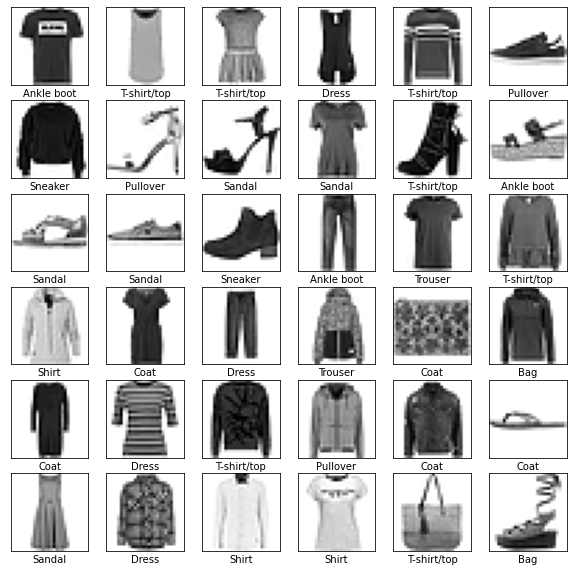

In [11]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1) # which position in the 5x5 subplot
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+1], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
test_images = test_images / 255 # regularising them to be between 0 and 1 
train_images = train_images / 255 # doing for both test and train 

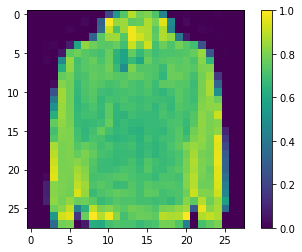

In [13]:
plt.figure()
plt.imshow(train_images[290])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
# We build the model first by defining the layers then compiling the model
model = tf.keras.Sequential([ # this defines it as a sequential model
    tf.keras.layers.Flatten(input_shape=(28, 28)), # This flattens the 28x28 array into a long array of 784 (=28*28)
    tf.keras.layers.Dense(128, activation='relu'), # a neural layer with 128 neurons/nodes
    tf.keras.layers.Dense(10) # produces 10 nodes each with a different weighting
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# optimizer is how the model updates based on the data it sees and its loss function
# loss function is the measure of accuracy
# metrics are used to monitor the training process, and in this case it uses accuracy, 
# accuracy is the proportion of images that are correctly classified

In [16]:
# we now fit the model using the training data
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6337 - accuracy: 0.7799
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3829 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3429 - accuracy: 0.8743
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3140 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2972 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2795 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2690 - accuracy: 0.8999: 0s - loss: 0.2690 - accuracy: 0.89
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2501 - accuracy: 0.9065
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2466 - accuracy: 0.9063
Epoch 10/10
1875/1875 [=======================

In [31]:
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=2)


1875/1875 - 2s - loss: 0.2242 - accuracy: 0.9160

Test accuracy


In [45]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) 
# using the commas defines each of the items in a list
# the model.evaluate method returns a list of two items

print('\nAccuracy on test data:', round(test_acc*100,3),"%")
print('\nAccuracy on training data:', round(train_acc*100,3),"%" )

313/313 - 0s - loss: 0.3350 - accuracy: 0.8838

Accuracy on test data: 88.38 %

Accuracy on training data: 91.602 %


In [18]:
# if a model performs worse on new data than on existing data it suggests overfitting
# this means it has adapted to take account of the noise in the data

In [ ]:
# for the original paper we should try simpler models first 
# Start with a simple model using only layers.Dense as a baseline, then create larger versions, and compare them

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [46]:
# We now try to make some predictions 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
# the output from the probability model is logits
# logits are the vector of raw (non-normalized) predictions that a classification model generates
# softmax is a function that provides probabilities for each possible class in a multi-class classification model
# e.g. prob image is a dog is 0.3, probability it is a cat is 0.7, total of all options is 1.0

In [52]:
predictions = probability_model.predict(test_images)

In [51]:
predictions[0]

array([5.7176162e-08, 2.8111291e-10, 2.4508374e-08, 1.1814923e-10,
       1.5557070e-07, 3.4188890e-04, 6.0196179e-08, 5.0609983e-03,
       6.2105672e-09, 9.9459684e-01], dtype=float32)

(array([9., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.9255970e-20, 9.9999949e-02, 1.9999990e-01, 2.9999986e-01,
        3.9999980e-01, 4.9999976e-01, 5.9999973e-01, 6.9999969e-01,
        7.9999959e-01, 8.9999956e-01, 9.9999952e-01], dtype=float32),
 <a list of 10 Patch objects>)

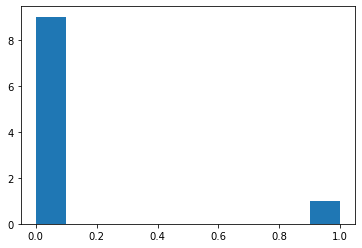

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(predictions[3]) # these are the different probabilities given by the prediction algorithm
# annoyingly this doesn't show the item along the axis
